<a href="https://colab.research.google.com/github/as0213/Python-Machine-Learning-/blob/main/Employee_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


  
EMPLOYEE HEALTH DATA


Importing Data (Employee Dataset)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/employee_data.csv')

In [ ]:
data.shape #Returns tuples

(1000, 7)

In [ ]:
data.head() #Displays rows

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [ ]:
data.info() #prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   id                1000 non-null   int64 
 2   groups            1000 non-null   object
 3   age               1000 non-null   int64 
 4   healthy_eating    1000 non-null   int64 
 5   active_lifestyle  1000 non-null   int64 
 6   salary            1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 62.5+ KB


In [ ]:
data[data.isnull().any(axis=1)] # select all rows with NaN under an entire DataFrame

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary


In [ ]:
data.dropna(inplace=True) #That means that if you set inplace = True , 
#dropna will drop all missing values from your original dataset. It will overwrite your data,

In [ ]:
data.columns #Displays columns of dataset

Index(['Unnamed: 0', 'id', 'groups', 'age', 'healthy_eating',
       'active_lifestyle', 'salary'],
      dtype='object')

In [ ]:
data.nunique() #Count of  Unique value

Unnamed: 0          1000
id                  1000
groups                 4
age                   47
healthy_eating        11
active_lifestyle      11
salary               101
dtype: int64

In [ ]:
data.isnull().sum() #It will return the count of null values in each column.It will count only the standard null values

Unnamed: 0          0
id                  0
groups              0
age                 0
healthy_eating      0
active_lifestyle    0
salary              0
dtype: int64

In [ ]:
new_data=data.drop(['Unnamed: 0'],axis=1) #Unnecessary column is getting dropped axis=1 (column) axis=0 (rows)

In [ ]:
new_data.head()

,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,A,36,5,5,2297
1,1,A,55,3,5,1134
2,2,A,61,8,1,4969
3,3,O,29,3,6,902
4,4,O,34,6,2,3574


TRAIN/TEST Data Split

In [ ]:
x = new_data.active_lifestyle #Data we want to test % train
y = new_data.healthy_eating

In [ ]:
x

0      5
1      5
2      1
3      6
4      2
      ..
995    7
996    2
997    7
998    7
999    9
Name: active_lifestyle, Length: 1000, dtype: int64

In [ ]:
y

0      5
1      3
2      8
3      3
4      6
      ..
995    7
996    1
997    9
998    6
999    4
Name: healthy_eating, Length: 1000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=1) 
#Splits arrays random train and test subsets
#test_size -> 20% validation data and 80% training data
#var_train subsets to fit() and the var_test subsets to predict()
# random_state a fixed value will guarantee that same sequence of random numbers
#are generated each time you run the code. And unless there is some other randomness present in the process,
#the results produced will be same as always. This helps in verifying the output

In [ ]:
len(x_train)

800

In [ ]:
len(x_test)

200

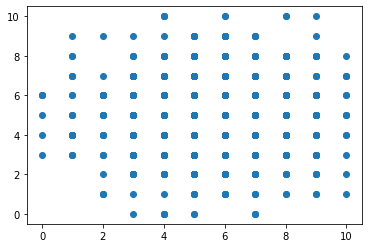

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.show()

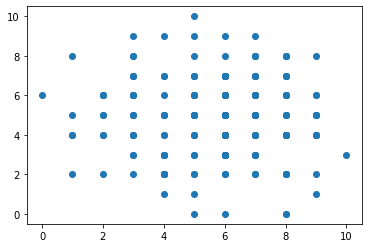

In [ ]:
plt.scatter(x_test, y_test)
plt.show()

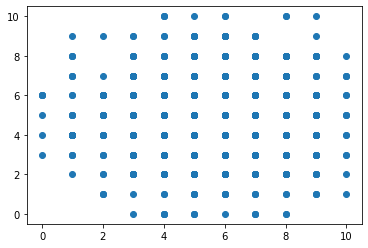

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #importing KNN
from sklearn import metrics
#Metrics implements several loss, score, and utility functions to measure classification performance

In [ ]:
x_train = x_train.values.reshape(-1,1) #Conversion from 1D array to 2D array as fit works on 2d array
x_test = x_test.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1) #for n=1
knn.fit(x_train, y_train) #Fit is used for training the data, Fitting a model means finding a pattern in data.
y_pred = knn.predict(x_test) #predict the values of any new data points. 
#The new point is assigned a value based on how closely it resembles the points in the training set.
#For testing the value.
print(metrics.accuracy_score(y_test, y_pred)) #Accuracy is defined as the percentage of correct predictions for the test data. 

0.18


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.19


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
k_range = range(1, 101) #n=1 to n=25

# Python dictionary using []
scores = []

# A loop through the range 1 to 25
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

scores #printing scores

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.18,
 0.18,
 0.18,
 0.195,
 0.19,
 0.19,
 0.185,
 0.19,
 0.18,
 0.2,
 0.205,
 0.2,
 0.205,
 0.205,
 0.205,
 0.205,
 0.2,
 0.205,
 0.205,
 0.205,
 0.205,
 0.2,
 0.2,
 0.195,
 0.195,
 0.195,
 0.195,
 0.195,
 0.195,
 0.195,
 0.195,
 0.2,
 0.195,
 0.2,
 0.2,
 0.21,
 0.21,
 0.21,
 0.205,
 0.205,
 0.2,
 0.205,
 0.2,
 0.195,
 0.205,
 0.195,
 0.2,
 0.195,
 0.205,
 0.205,
 0.205,
 0.2,
 0.2,
 0.205,
 0.205,
 0.205,
 0.195,
 0.195,
 0.195,
 0.195,
 0.195,
 0.195,
 0.195,
 0.195,
 0.195,
 0.195,
 0.195,
 0.195,
 0.19,
 0.19,
 0.17,
 0.19,
 0.19,
 0.2,
 0.2,
 0.2,
 0.2,
 0.185,
 0.185,
 0.185,
 0.185,
 0.185,
 0.185,
 0.185,
 0.175,
 0.175,
 0.17,
 0.17,
 0.18,
 0.18,
 0.175,
 0.175,
 0.165,
 0.18,
 0.18,
 0.175,
 0.175,
 0.175,
 0.175,
 0.17]

Text(0, 0.5, 'Testing Accuracy')

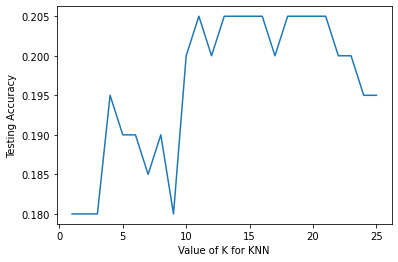

In [ ]:
# import Matplotlib 
import matplotlib.pyplot as plt

# Allow plots to appear within the notebook
%matplotlib inline

# plotting the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
# Labeling x & y axis
plt.xlabel('Value of K for KNN') 
plt.ylabel('Testing Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11) #Optimal value=11 as high accuracy
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.205


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
knn=KNeighborsClassifier(n_neighbours=11)
knn.fir(x_train,y_tra)